In [573]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [574]:
!which python

/Users/ziru/miniforge3/envs/gesture_input/bin/python


### Preprocessing

In [575]:
from pathlib import Path
import pandas as pd
import numpy as np

# 数据根目录
data_folder = Path("./data/")

# 存储按手势分类的所有用户数据
gesture_data = {}
gesture_durations = {}  # 存储每个手势的总时间长度

# 步骤1: 从所有用户目录收集手势数据并计算总时间长度
print("收集用户数据并计算总时间长度...")
for user_dir in sorted(data_folder.glob("user_*")):
    user_name = user_dir.name
    print(f"处理用户: {user_name}")
    
    for gesture_file in sorted(user_dir.glob("*.csv"), key=lambda x: x.stem):
        gesture_name = gesture_file.stem
        df = pd.read_csv(gesture_file)
        df['user'] = user_name

        # 跳过开头和结尾的0.5秒
        min_time, max_time = df["timestamp"].min(), df["timestamp"].max()
        df_filtered = df[(df["timestamp"] >= min_time + 0.5) & 
                         (df["timestamp"] <= max_time - 0.5)].reset_index(drop=True)

        if gesture_name not in gesture_data:
            gesture_data[gesture_name] = []
            gesture_durations[gesture_name] = 0
        
        # 计算这个手势样本的时间长度并添加到总长度
        sample_duration = df_filtered["timestamp"].max() - df_filtered["timestamp"].min()
        gesture_durations[gesture_name] += sample_duration
        
        # 保存处理后的数据
        gesture_data[gesture_name].append(df_filtered)

# 统计信息：每个手势的时间长度和样本数
print("\n手势数据统计:")
for gesture_name, dfs in gesture_data.items():
    total_samples = sum(len(df) for df in dfs)
    print(f"手势 '{gesture_name}':")
    print(f"  - 总时长: {gesture_durations[gesture_name]:.2f}秒")
    print(f"  - 用户数: {len(dfs)}")
    print(f"  - 总样本数: {total_samples}")
    
    # 显示每个用户的样本详情
    for i, df in enumerate(dfs):
        user = df['user'].iloc[0]
        duration = df["timestamp"].max() - df["timestamp"].min()
        print(f"    - {user}: {len(df)}个样本, {duration:.2f}秒")

# 步骤2: 直接合并每个手势的所有用户数据（不裁剪）
processed_data = {}

for gesture_name, dfs in gesture_data.items():
    # 直接合并所有用户的数据
    combined_df = pd.concat(dfs, ignore_index=True)
    processed_data[gesture_name] = combined_df
    
    # 合并后的统计信息
    print(f"\n手势 '{gesture_name}' 合并后:")
    print(f"  - 总样本数: {len(combined_df)}")
    
    # 按用户统计合并后的样本
    for user in combined_df['user'].unique():
        user_df = combined_df[combined_df['user'] == user]
        user_duration = user_df["timestamp"].max() - user_df["timestamp"].min()
        print(f"    - {user}: {len(user_df)}个样本, {user_duration:.2f}秒")

# 步骤3: 保存处理后的数据
output_dir = Path("./processed_data/")
output_dir.mkdir(exist_ok=True)

for gesture_name, df in processed_data.items():
    output_file = output_dir / f"{gesture_name}.csv"
    df.to_csv(output_file, index=False)
    print(f"已保存: {output_file}")

print("\n所有处理完成的手势:")
print(list(processed_data.keys()))


收集用户数据并计算总时间长度...
处理用户: user_1
处理用户: user_2
处理用户: user_3
处理用户: user_4

手势数据统计:
手势 'b':
  - 总时长: 58.33秒
  - 用户数: 3
  - 总样本数: 515
    - user_1: 186个样本, 21.07秒
    - user_2: 151个样本, 17.10秒
    - user_3: 178个样本, 20.17秒
手势 'c':
  - 总时长: 59.55秒
  - 用户数: 3
  - 总样本数: 526
    - user_1: 186个样本, 21.06秒
    - user_2: 160个样本, 18.10秒
    - user_3: 180个样本, 20.38秒
手势 'd':
  - 总时长: 63.67秒
  - 用户数: 3
  - 总样本数: 562
    - user_1: 225个样本, 25.50秒
    - user_2: 157个样本, 17.78秒
    - user_3: 180个样本, 20.39秒
手势 'f':
  - 总时长: 53.95秒
  - 用户数: 3
  - 总样本数: 477
    - user_1: 150个样本, 16.95秒
    - user_2: 150个样本, 16.98秒
    - user_3: 177个样本, 20.03秒
手势 'g':
  - 总时长: 56.18秒
  - 用户数: 3
  - 总样本数: 496
    - user_1: 169个样本, 19.14秒
    - user_2: 151个样本, 17.10秒
    - user_3: 176个样本, 19.94秒
手势 'h':
  - 总时长: 55.06秒
  - 用户数: 3
  - 总样本数: 486
    - user_1: 162个样本, 18.36秒
    - user_2: 148个样本, 16.76秒
    - user_3: 176个样本, 19.94秒
手势 'n':
  - 总时长: 59.82秒
  - 用户数: 3
  - 总样本数: 528
    - user_1: 176个样本, 19.94秒
    - user_2: 176个样本, 19.94

In [576]:
# look at data from one gesture
data["u"]

L-AccX   L-AccY   L-AccZ    L-GyrX    L-GyrY    L-GyrZ   R-AccX  \
0   -0.00750 -0.00375  0.10125 -0.015137 -0.019150 -0.002320  0.03375   
1    0.00125  0.03250  0.15875 -0.015015 -0.006730 -0.009612  0.03875   
2   -0.01125 -0.00125  0.12875  0.002105 -0.007935 -0.000260  0.04500   
3   -0.00875  0.02875  0.13500  0.002045  0.001968  0.001692  0.04625   
4   -0.01125  0.01125  0.15625  0.013978 -0.001830  0.000305  0.05125   
..       ...      ...      ...       ...       ...       ...      ...   
145 -0.01125  0.01375  0.12250  0.000520  0.001847 -0.000275  0.04000   
146 -0.02250 -0.01000  0.16250  0.011245  0.003600  0.001160  0.04000   
147 -0.00750 -0.00125  0.15750  0.035478  0.032120  0.010408  0.04125   
148  0.01375 -0.03625  0.06625  0.015305 -0.001220 -0.003357  0.05750   
149  0.00875  0.00750  0.09500 -0.012512 -0.022218  0.001587  0.02750   

      R-AccY   R-AccZ    R-GyrX    R-GyrY    R-GyrZ     timestamp  
0   -0.00125  0.11750 -0.010802  0.001082  0.008255  1.742089e+09  
1   -0.03500  0.11000 -0.006835  0.007065  0.002060  1.742089e+09  
2   -0.02000  0.10750 -0.004715  0.001420  0.001677  1.742089e+09  
3   -0.01875  0.11000 -0.001480  0.000702  0.000687  1.742089e+09  
4   -0.01875  0.10750  0.000550  0.000580  0.001008  1.742089e+09  
..       ...      ...       ...       ...       ...           ...  
145 -0.01000  0.11500  0.000092  0.000580 -0.000015  1.742089e+09  
146 -0.00750  0.11500  0.001220 -0.000260  0.000198  1.742089e+09  
147 -0.01000  0.10125  0.003998 -0.005540 -0.000168  1.742089e+09  
148 -0.02500  0.17750  0.008667  0.030960  0.004105  1.742089e+09  
149  0.00250  0.12750 -0.001465 -0.011352 -0.004593  1.742089e+09  

[150 rows x 13 columns]

手势 'c' CSV文件行数: 526
手势 'u' CSV文件行数: 531
手势 'b' CSV文件行数: 515
手势 'f' CSV文件行数: 477
手势 'g' CSV文件行数: 496
手势 'd' CSV文件行数: 562
手势 'h' CSV文件行数: 486
手势 'o' CSV文件行数: 720
手势 'n' CSV文件行数: 528


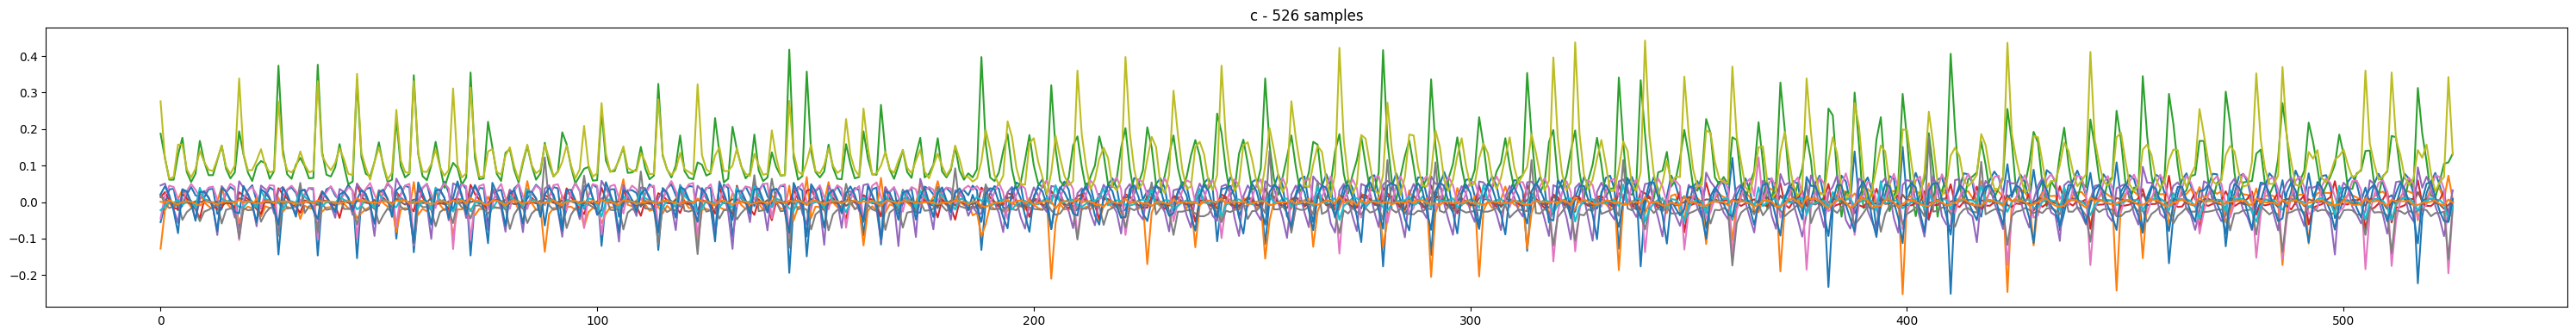

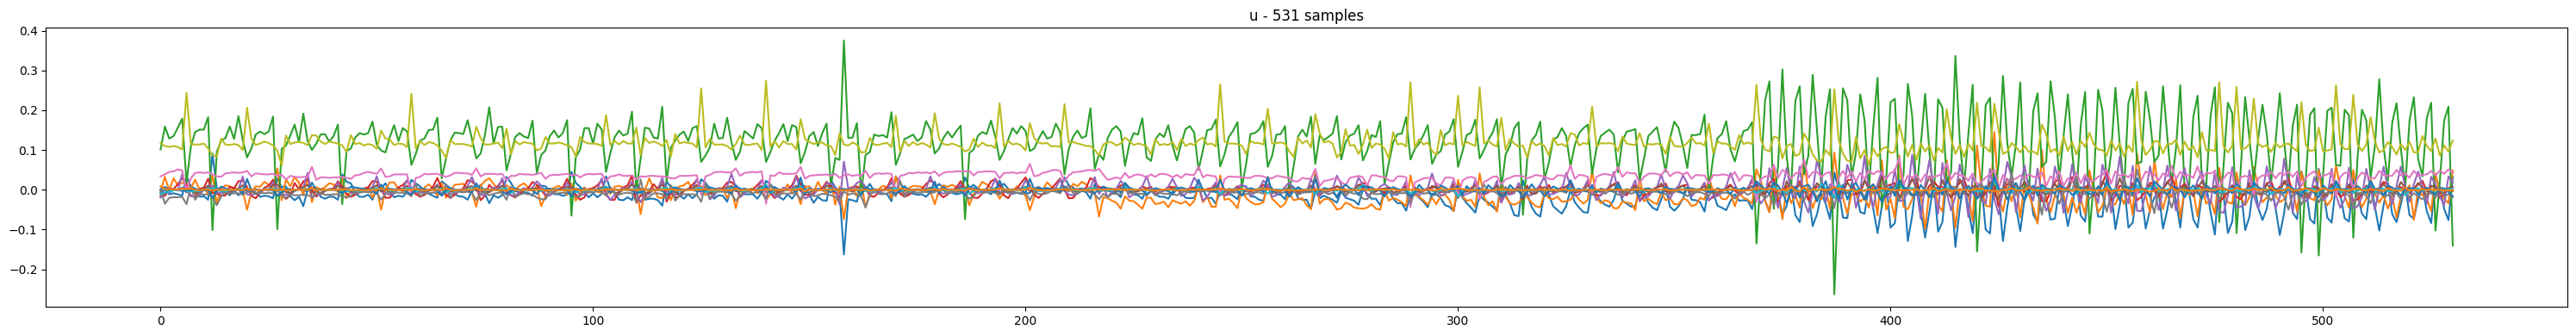

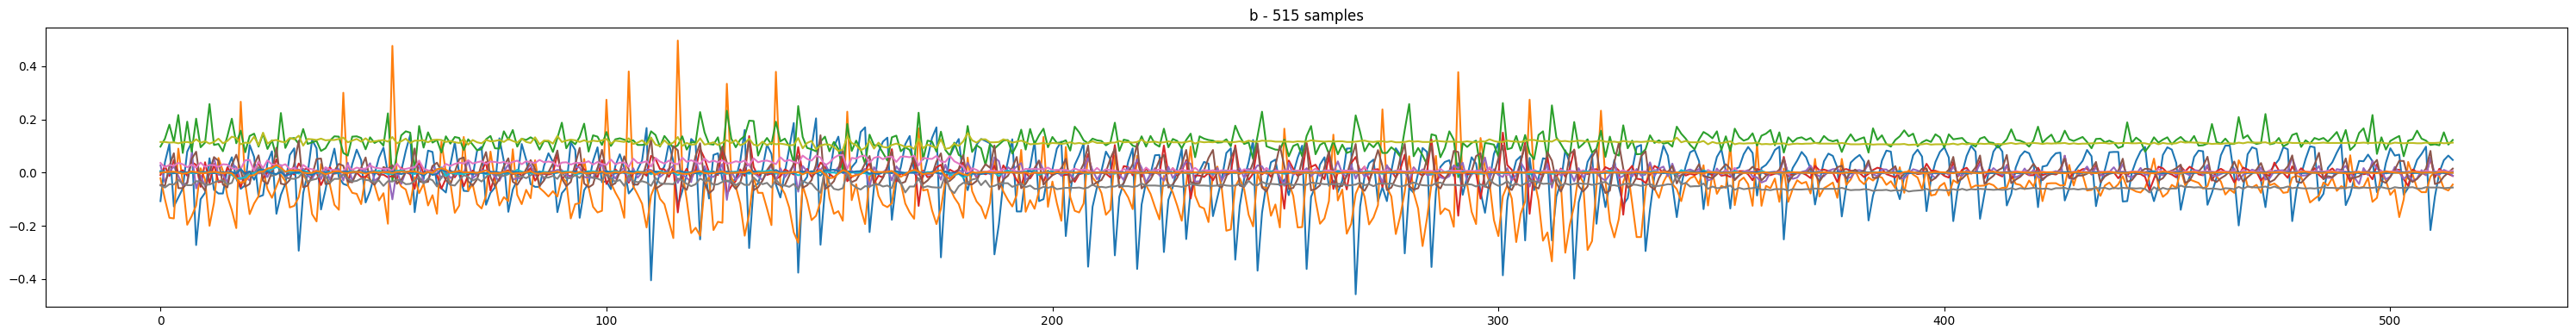

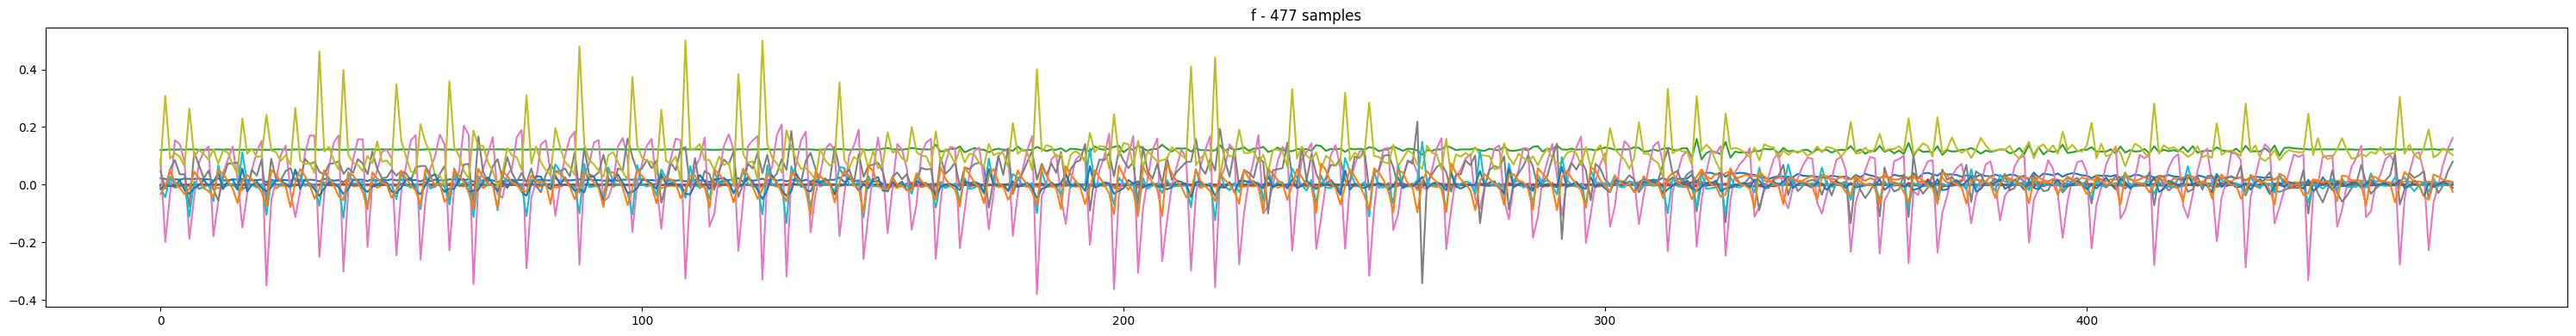

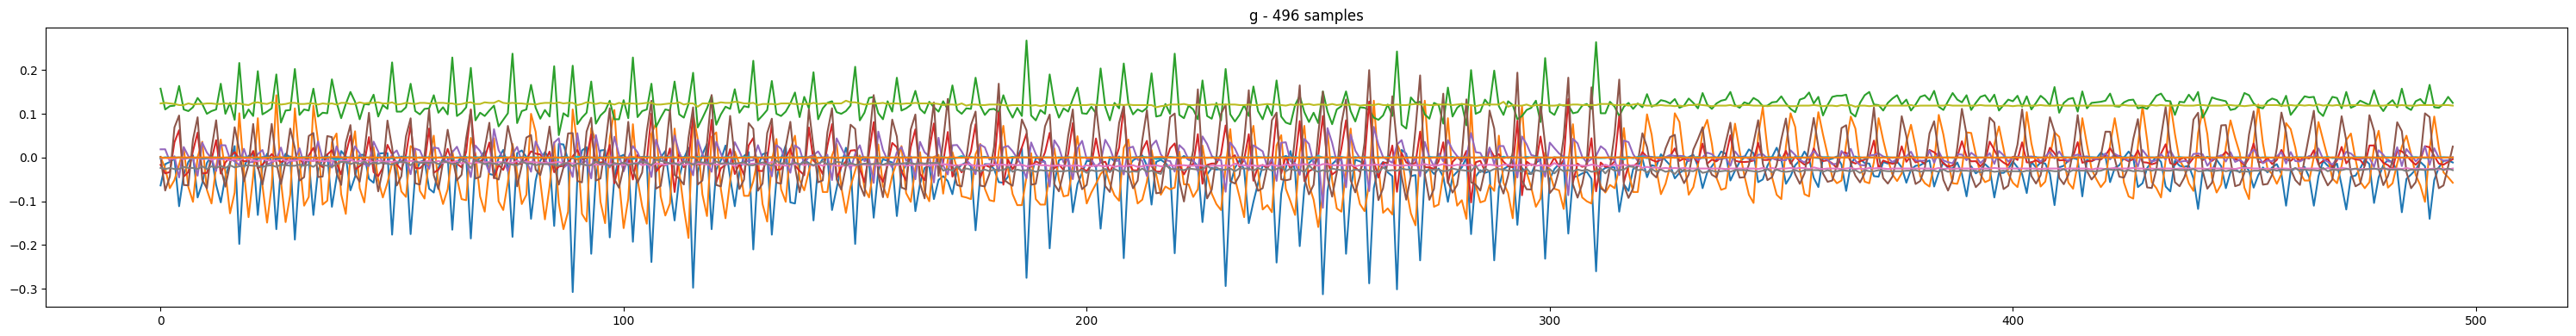

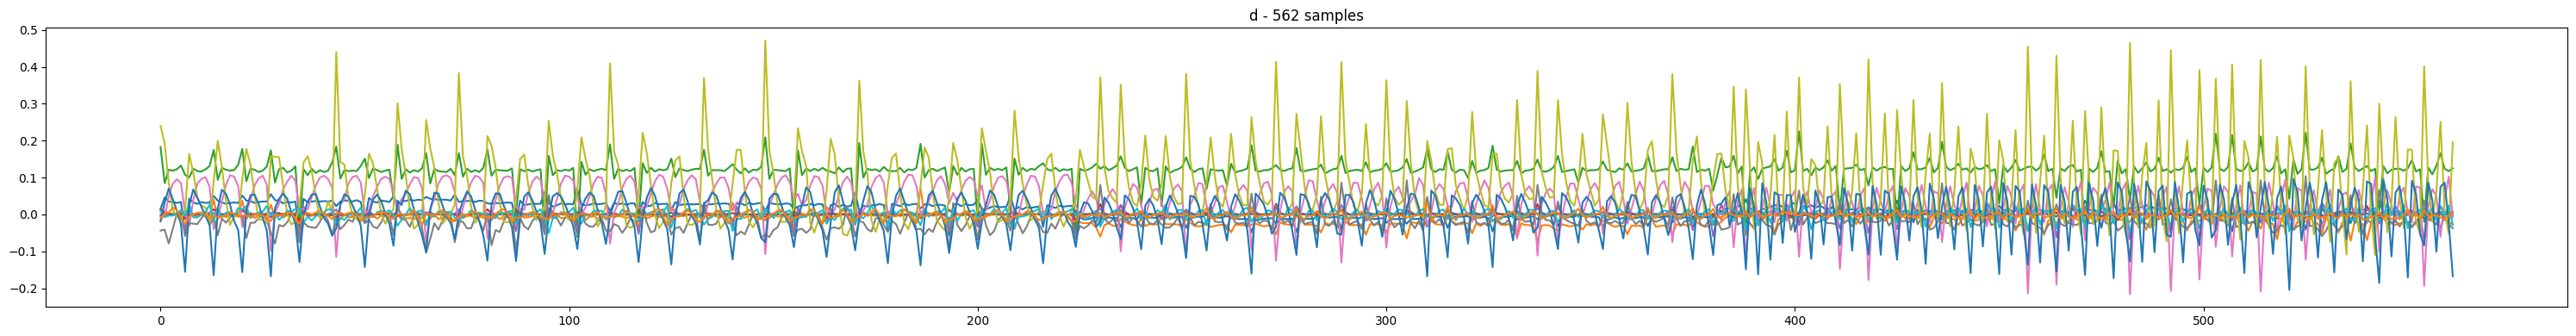

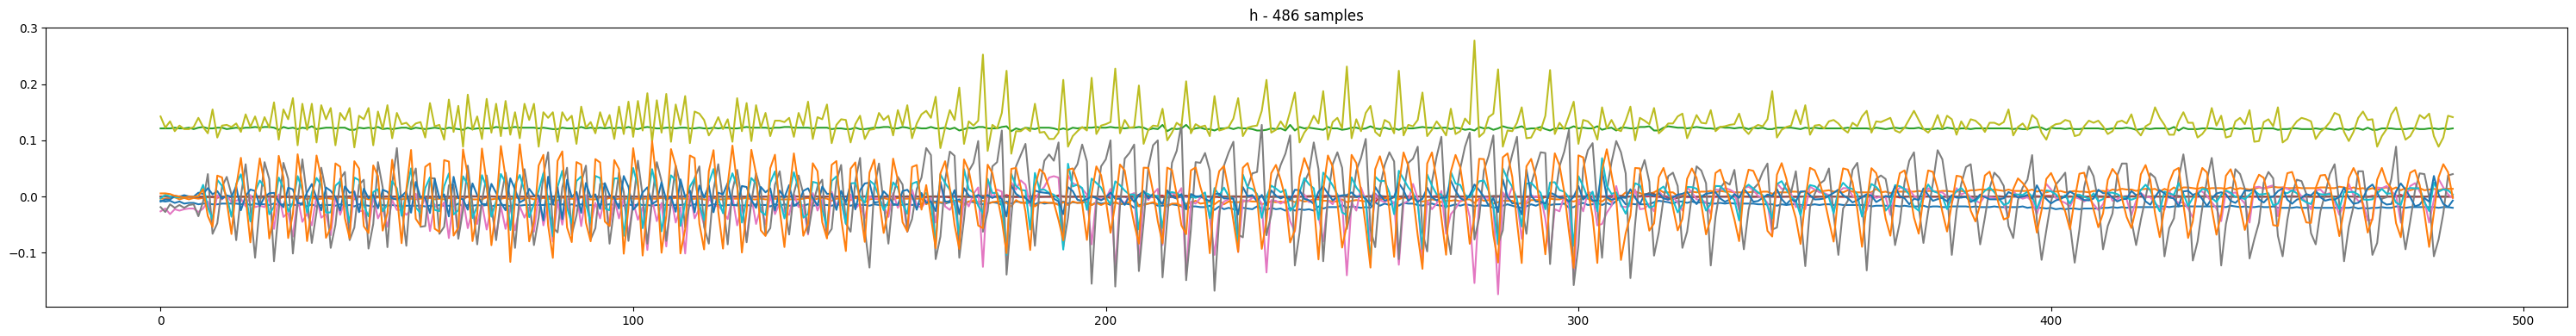

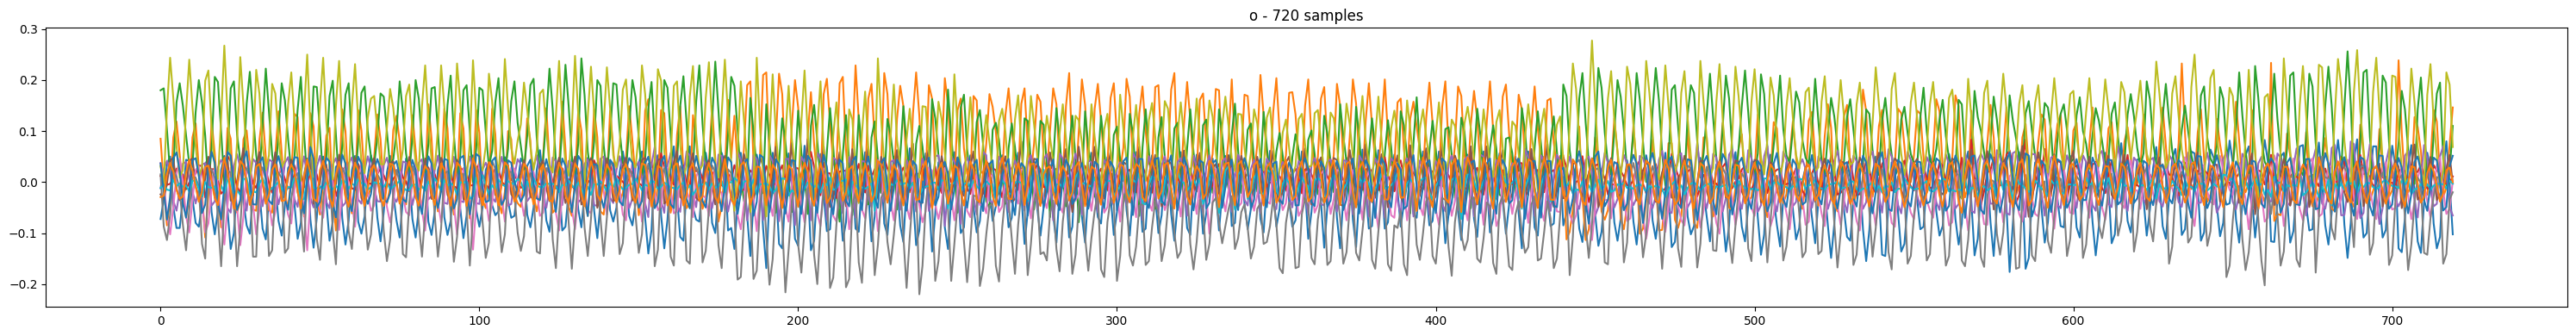

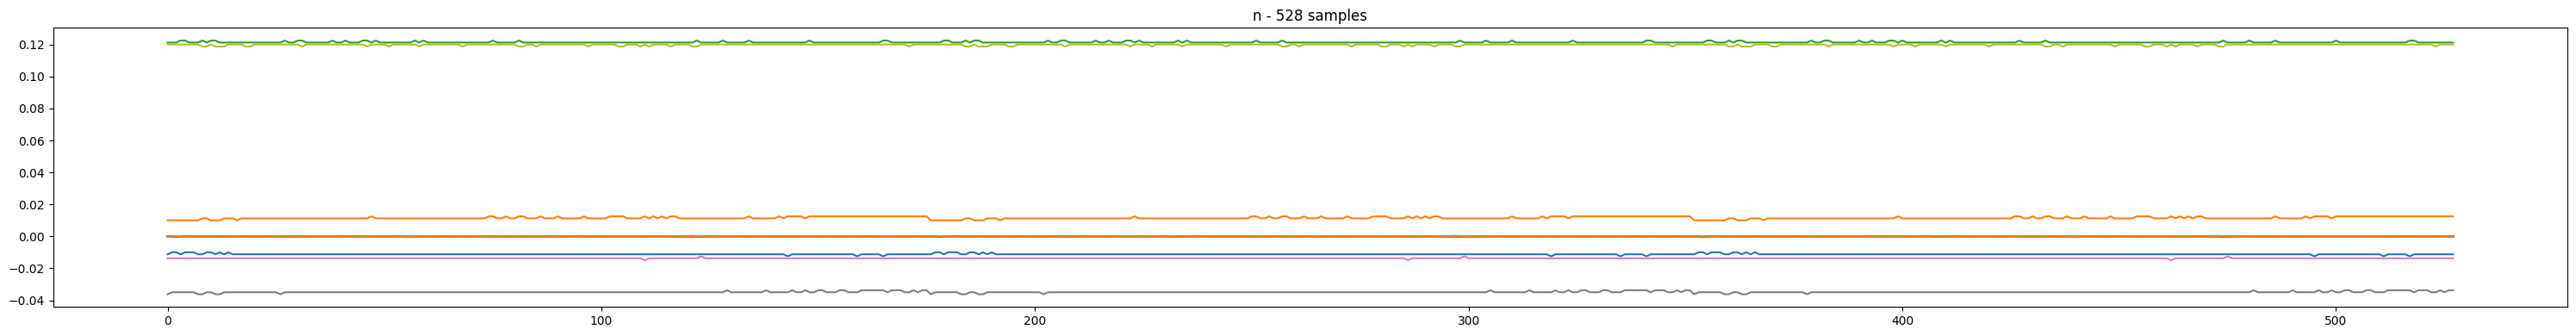

In [577]:
# 从处理后的CSV文件加载数据
processed_dir = Path("./processed_data/")
visualization_data = {}

# 加载所有处理后的CSV文件
for csv_file in processed_dir.glob("*.csv"):
    gesture_name = csv_file.stem
    df = pd.read_csv(csv_file)
    visualization_data[gesture_name] = df
    
    # 打印每个文件的行数
    print(f"手势 '{gesture_name}' CSV文件行数: {len(df)}")

# 可视化所有手势数据
for gesture_name, df in visualization_data.items():
    plt.figure(figsize=(30, 4))
    plt.title(f"{gesture_name} - {len(df)} samples")
    
    # 绘制传感器数据 (除去timestamp和user列)
    sensor_columns = [col for col in df.columns if col not in ['timestamp', 'user']]
    df[sensor_columns].plot(ax=plt.gca(), legend=False)
    
    plt.tight_layout()
    plt.show()

### Training

1. 输入层
`Input(shape=(6 * window_size,))`

- 输入形状: (6 * window_size,)，例如 (300,)（假设 window_size=50，6 个 IMU 特征）。

- 作用: 接收展平后的滑动窗口数据（每个窗口包含 50 个时间步 × 6 个传感器维度 = 300 个特征）。

2. 全连接隐藏层
`Dense(64, activation='relu')`

- 神经元数量: 64

- 激活函数: ReLU（修正线性单元），引入非线性，帮助模型学习复杂模式。

- 参数数量: (300 + 1) * 64 = 19,264（300 输入特征，64 个神经元，每个神经元有 1 个偏置项）。

3. 输出层
`Dense(len(data.keys()), activation='softmax')`

- 神经元数量: 等于手势类别数（例如 data.keys() 返回 ['wave', 'circle', 'swipe']，则神经元数为 3）。

- 激活函数: Softmax，将输出转换为概率分布（所有类别的概率之和为 1）。

- 参数数量: (64 + 1) * num_classes（例如 3 类时有 (64+1)*3=195 个参数）。

1. 优化器 (Optimizer)  优化器 (Optimizer)
Adam(learning_rate=3e-4):

自适应学习率的优化算法，结合了动量（Momentum）和 RMSProp 的优点。

learning_rate=3e-4 是初始学习率，较小的值适合精细调整权重。

2. 损失函数 (Loss)
SparseCategoricalCrossentropy():

适用于多分类任务，且标签为整数形式（例如 0, 1, 2）。

如果是 one-hot 编码标签，应使用 CategoricalCrossentropy。

3. 评估指标 (Metrics)
SparseCategoricalAccuracy(name='accuracy'):

计算分类准确率，正确预测的样本比例。

同样适用于整数标签。

模型改进思路
调整网络结构:

增加更多隐藏层（如取消注释的 Dense(64, activation='relu')）。

添加 Dropout 层防止过拟合：

python
keras.layers.Dropout(0.5)
优化超参数:

调整学习率（如 1e-3 或 1e-4）。

使用学习率调度（如 ReduceLROnPlateau）。

数据增强:

对 IMU 数据进行随机扰动（如添加噪声、时间偏移）以增强鲁棒性。

In [578]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import keras
from pathlib import Path
import pickle
import time
import os

# 创建模型保存目录
os.makedirs("./models", exist_ok=True)
os.makedirs("./checkpoints", exist_ok=True)

# 从处理后的CSV文件加载数据
processed_dir = Path("./processed_data/")
processed_data = {}

print("加载处理过的数据...")
for csv_file in processed_dir.glob("*.csv"):
    gesture_name = csv_file.stem
    df = pd.read_csv(csv_file)
    processed_data[gesture_name] = df
    print(f"已加载手势 '{gesture_name}' - {len(df)}行")

# 准备训练数据
window_size = 50
X = []
y = []

for gesture_name, df in processed_data.items():
    # 排除非特征列（timestamp和user）
    feature_cols = [col for col in df.columns if col not in ['timestamp', 'user']]
    df_features = df[feature_cols].values
    
    print(f"处理手势'{gesture_name}'，特征形状: {df_features.shape}")
    
    for i in range(0, len(df) - window_size):
        X.append(df_features[i:i+window_size])
        y.append(gesture_name)

X = np.array(X)  # => (样本数, 50, 6)
y = np.array(y)  # => (样本数, )

print("X.shape =", X.shape)  # (N, 50, 6)
print("y.shape =", y.shape)  # (N, )

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# 把字符串标签转成整数
encoder = LabelEncoder()
y_int = encoder.fit_transform(y)  # 0 ~ (num_classes-1)


# 划分训练/测试集
X_train, X_test, y_train, y_test = train_test_split(X, y_int, test_size=0.2, random_state=42)
print("X_train.shape =", X_train.shape, "y_train.shape =", y_train.shape)
print("X_test.shape =", X_test.shape, "y_test.shape =", y_test.shape)

# 定义模型
model = keras.Sequential([
    keras.layers.Input(shape=(window_size, 12)),  # (50, 6)
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(encoder.classes_), activation='softmax')  # 类别数 = labelEncoder 的 classes_ 数量
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=3e-4),
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=[keras.metrics.SparseCategoricalAccuracy(name='accuracy')]
)

# 训练
batch_size = 24
epochs = 30

callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="./checkpoints/model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=2),
]

history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15,
    callbacks=callbacks,
)

# 测试集评估
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])


加载处理过的数据...
已加载手势 'c' - 526行
已加载手势 'u' - 531行
已加载手势 'b' - 515行
已加载手势 'f' - 477行
已加载手势 'g' - 496行
已加载手势 'd' - 562行
已加载手势 'h' - 486行
已加载手势 'o' - 720行
已加载手势 'n' - 528行
处理手势'c'，特征形状: (526, 12)
处理手势'u'，特征形状: (531, 12)
处理手势'b'，特征形状: (515, 12)
处理手势'f'，特征形状: (477, 12)
处理手势'g'，特征形状: (496, 12)
处理手势'd'，特征形状: (562, 12)
处理手势'h'，特征形状: (486, 12)
处理手势'o'，特征形状: (720, 12)
处理手势'n'，特征形状: (528, 12)
X.shape = (4391, 50, 12)
y.shape = (4391,)
X_train.shape = (3512, 50, 12) y_train.shape = (3512,)
X_test.shape = (879, 50, 12) y_test.shape = (879,)
Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.2457 - loss: 2.1353 - val_accuracy: 0.4687 - val_loss: 1.8965
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5219 - loss: 1.8169 - val_accuracy: 0.6584 - val_loss: 1.5535
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7097 - loss: 1.4625 - val_accuracy: 0.8539 - val_loss: 1.2486
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8704 - loss: 1.1

👉 callbacks 是训练过程中的“自动助手”，可以自动执行任务，比如保存模型、提前停止训练、调整学习率等。
👉 ModelCheckpoint 可以在每个 epoch 结束后保存模型，防止意外丢失训练进度。
👉 EarlyStopping 监控 val_loss，如果 2 轮不下降就停止训练，避免过拟合。

### Evaluation

In [579]:
print(f"Test loss: {score[0]:.4f}", f"Test accuracy: {score[1]:.4f}")

Test loss: 0.0747 Test accuracy: 0.9920


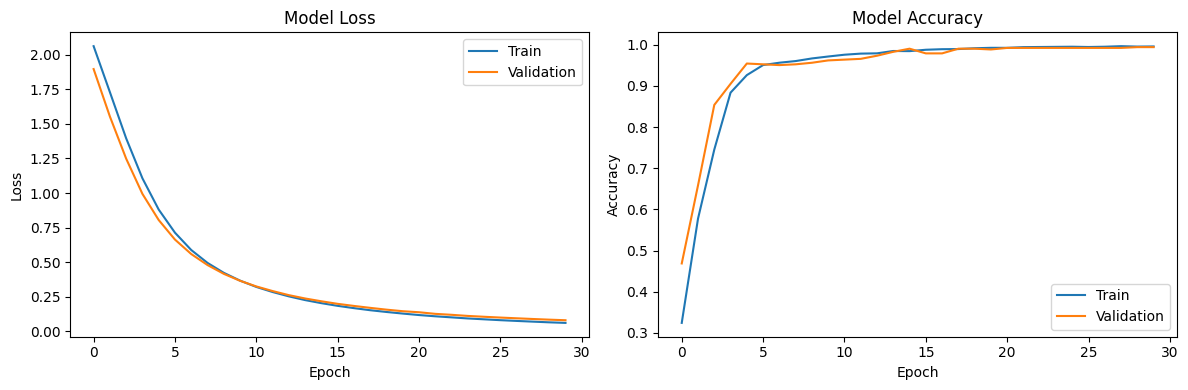

In [580]:
# Plot training & validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

In [581]:
'_'.join(sorted(processed_data.keys()))

'b_c_d_f_g_h_n_o_u'

### Saving

In [582]:
# save the model
import pickle
import time

# make the model name based on the gesture names
run_timestamp = str(time.time()).replace(".", "-")
model_name = '_'.join(sorted(processed_data.keys())) + "__" + run_timestamp

# make a model directory
model_dir = Path('./models')
model_dir.mkdir(parents=True, exist_ok=True)

with open(model_dir / f'{model_name}.keras', 'wb') as f:
    pickle.dump(model, f)
with open(model_dir / f'label_encoder_{model_name}.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [583]:
print(model_name)

b_c_d_f_g_h_n_o_u__1742101913-054409


In [584]:
model.predict(X_test[[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[3.0970561e-05, 7.7633392e-03, 1.3650712e-05, 1.0996264e-05,
        1.9903578e-02, 1.7323799e-02, 9.4059151e-01, 1.3944902e-02,
        4.1718333e-04]], dtype=float32)

In [585]:
X_test.shape

(879, 50, 12)